In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('data/combined_data/200124_final_data.csv')
df = df.drop(columns={'Unnamed: 0'})
print(df.head())
print(df.shape)

       C  Charpy     Cr     Cu  Diffusible Hydrogen  Elongation  Lateral  \
0  0.150    27.0  0.200    NaN                  4.0        22.0      NaN   
1  0.055   226.5  0.045    NaN                  2.5        31.0      NaN   
2    NaN     NaN    NaN    NaN                  NaN        22.0      NaN   
3    NaN    95.0    NaN    NaN                  NaN        28.5      NaN   
4  0.075     NaN  6.000  0.005                  NaN        19.0      NaN   

     Mn  Mn + Ni + Cr + Mo + V    Mo  ...  Redry_Time  Redrying_Temp  Rm  Rp0  \
0  1.60                  1.750  0.30  ...         NaN            NaN NaN  NaN   
1  1.28                  1.395  0.05  ...         NaN            NaN NaN  NaN   
2   NaN                    NaN   NaN  ...         NaN            NaN NaN  NaN   
3   NaN                    NaN   NaN  ...         NaN            NaN NaN  NaN   
4  0.70                    NaN  0.15  ...         NaN            NaN NaN  NaN   

   Sn  Suitable_For  Ti  Zn  Zr  url  
0 NaN           N

In [44]:
def drop_txt_rows(data):
    for col in data.columns:
        if data[col].dtype ==object:
            data = data.drop(col, axis=1)  
    data = data.fillna(0)
    return data
            
df = drop_txt_rows(df)

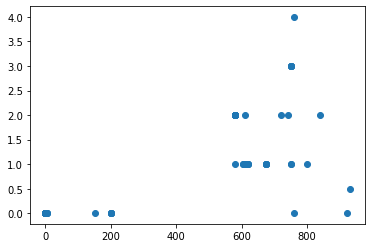

In [45]:
plt.scatter(df['HT_Temp'],df['HT_Time'])

/home/prasann/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/prasann/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


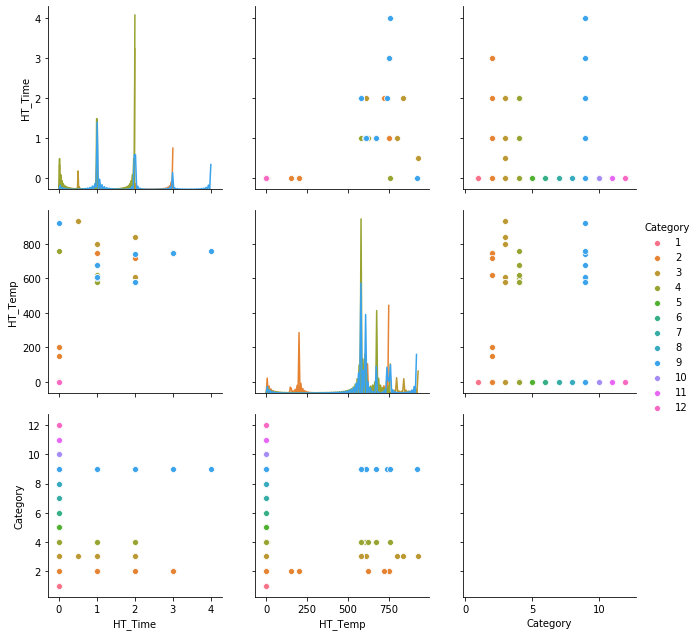

In [48]:
sns.pairplot(df[{'HT_Temp', 'HT_Time','Category' }], hue='Category' ,height=3);
plt.show()

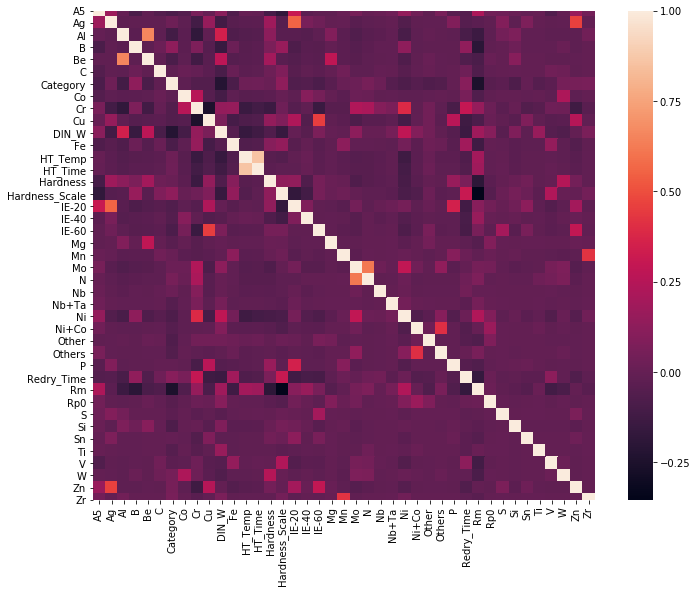

In [55]:
corr_mat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, square=True)

In [ ]:
f, ax = plt.subplots(51,figsize=(12,9))
i = 0
for col in df.columns:
    sns.distplot(df[col], a=ax[i])
    i+=1
    

In [9]:
#Getting columns
for c in df.columns:
    print(c)


C
Charpy
Cr
Cu
Diffusible Hydrogen
Elongation
Lateral
Mn
Mn + Ni + Cr + Mo + V
Mo
Ni
P
P S
S
S Ni
Si
Tensile
V
Yield
aws
conformances
ind
key features
requirements
typic_results
typical applications
Elongation_Temperature
Reduction of area
Reduction of area_Temperature
Ultimate tensile strength
Ultimate tensile strength_Temperature
Yield strength
Yield strength_Temperature
Acicular ferrite
Acicular ferrite_Temperature
Ferrite with carbide aggregate
Ferrite with carbide aggregate_Temperature
Ferrite with second phase
Ferrite with second phase_Temperature
Primary ferrite in microstructure
Primary ferrite in microstructure_Temperature
50% FATT
50% FATT_Temperature
Hardness
Hardness_Temperature
Manual metal arc_Current
Manual metal arc_Electrode
Manual metal arc_Heat input
Manual metal arc_Interpass temperature
Manual metal arc_Source
Manual metal arc_Voltage
Post weld heat treatment_Post weld heat treatment temperature
Post weld heat treatment_Post weld heat treatment time
Flux cored arc_

In [11]:
pd.DataFrame(df.columns).to_json('columns.json', orient= 'index')